In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import nltk
import re
import csv

In [2]:
#reading the "anime" dataset

animedata=pd.read_csv("/Users/moh/Downloads/archive-3/animes.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/moh/Downloads/archive-3/animes.csv'

In [ ]:
#anime first 5 rows
animedata.head(5)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [ ]:
#checking anime dataset columns
animedata.columns

Index(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score', 'img_url', 'link'],
      dtype='object')

In [ ]:
#Dropping unwanted columns
animedata=animedata.drop([
    'img_url','link','uid','aired','members','popularity',
    ],axis=1)

In [ ]:
#checking anime dataset columns
animedata.columns

Index(['title', 'synopsis', 'genre', 'episodes', 'ranked', 'score'], dtype='object')

In [ ]:
#checking the first 10 columns of the 'sypnopsis' column
animedata['synopsis'][:10]

0    Following their participation at the Inter-Hig...
1    Music accompanies the path of the human metron...
2    The Abyss—a gaping chasm stretching down into ...
3    "In order for something to be obtained, someth...
4    After helping revive the legendary vampire Kis...
5    Shigeo "Mob" Kageyama is now maturing and unde...
6    Stubborn, spoiled, and naïve, 10-year-old Chih...
7    Ever since the death of his father, the burden...
8    Following an encounter with oddity specialist ...
9    One year has passed since the Black Rebellion,...
Name: synopsis, dtype: object

In [ ]:
#printing the first 10 rows of 'synopsis'
for txt in animedata['synopsis'][:10]:
    print(txt)

Following their participation at the Inter-High, the Karasuno High School volleyball team attempts to refocus their efforts, aiming to conquer the Spring tournament instead.  
 
When they receive an invitation from long-standing rival Nekoma High, Karasuno agrees to take part in a large training camp alongside many notable volleyball teams in Tokyo and even some national level players. By playing with some of the toughest teams in Japan, they hope not only to sharpen their skills, but also come up with new attacks that would strengthen them. Moreover, Hinata and Kageyama attempt to devise a more powerful weapon, one that could possibly break the sturdiest of blocks.  
 
Facing what may be their last chance at victory before the senior players graduate, the members of Karasuno's volleyball team must learn to settle their differences and train harder than ever if they hope to overcome formidable opponents old and new—including their archrival Aoba Jousai and its world-class setter Tooru 

In [ ]:
#shows current shape of animedata
animedata.shape

(19311, 6)

In [ ]:
#displays the different types of data present in the dataset
animedata.dtypes

title        object
synopsis     object
genre        object
episodes    float64
ranked      float64
score       float64
dtype: object

In [ ]:
#counts the different genre
animedata.genre.value_counts()

['Hentai']                                                                 1837
['Music']                                                                   728
['Comedy']                                                                  642
['Kids']                                                                    412
['Dementia']                                                                202
                                                                           ... 
['Drama', 'Fantasy', 'Mystery', 'Romance', 'School']                          1
['Action', 'Comedy', 'Magic', 'Shounen', 'Super Power', 'Supernatural']       1
['Parody', 'Mecha', 'Sci-Fi']                                                 1
['Action', 'Adventure', 'Fantasy', 'Comedy', 'Super Power', 'Shounen']        1
['Music', 'Romance', 'Super Power', 'Supernatural']                           1
Name: genre, Length: 4851, dtype: int64

In [ ]:
#returns 'genre' first object
animedata['genre'][0]

"['Comedy', 'Sports', 'Drama', 'School', 'Shounen']"

In [ ]:
#print length of the data
print(len(animedata))
#print shape of the dataset
print(animedata.shape)
#making 'a' equal to the first 20 'genre' and returning the value count of it 
a=animedata['genre'].value_counts()[:20]
#making 'b' return the key of the list and printing it
b=a.keys().tolist()
print(b)

19311
(19311, 6)
["['Hentai']", "['Music']", "['Comedy']", "['Kids']", "['Dementia']", "['Slice of Life']", "['Music', 'Kids']", "['Slice of Life', 'Comedy']", "['Kids', 'Music']", "['Fantasy']", "['Drama']", "['Comedy', 'Kids']", "['Comedy', 'Slice of Life']", "['Comedy', 'Parody']", "['Fantasy', 'Kids']", "['Drama', 'Kids']", "['Adventure', 'Fantasy']", "['Adventure']", "['Historical']", '[]']


<AxesSubplot:xlabel='count', ylabel='genre'>

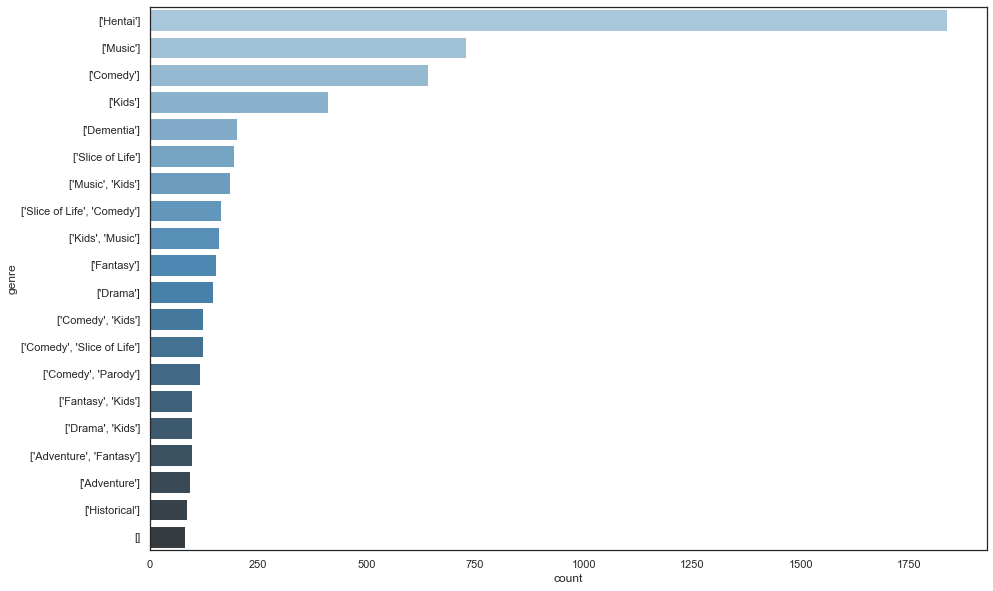

In [ ]:
#displaying the 'genre' and 'count' into a barplot 
sns.set(style="white")
genre_to_count=pd.DataFrame({'genre':a.index, 'count':a.values})
plt.figure(figsize=(15,10))
sns.barplot(y="genre", x="count", data=genre_to_count,palette="Blues_d")

In [ ]:
#print length of the data
print(len(animedata))
#print shape of the dataset
print(animedata.shape)
#making 'a' equal to the first 10 'Score' and returning the value count of it 
a=animedata['genre'].value_counts()[:10]
#making 'b' return the key of the list and printing it
b=a.keys().tolist()
print(b)

19311
(19311, 6)
["['Hentai']", "['Music']", "['Comedy']", "['Kids']", "['Dementia']", "['Slice of Life']", "['Music', 'Kids']", "['Slice of Life', 'Comedy']", "['Kids', 'Music']", "['Fantasy']"]


<AxesSubplot:xlabel='count', ylabel='score'>

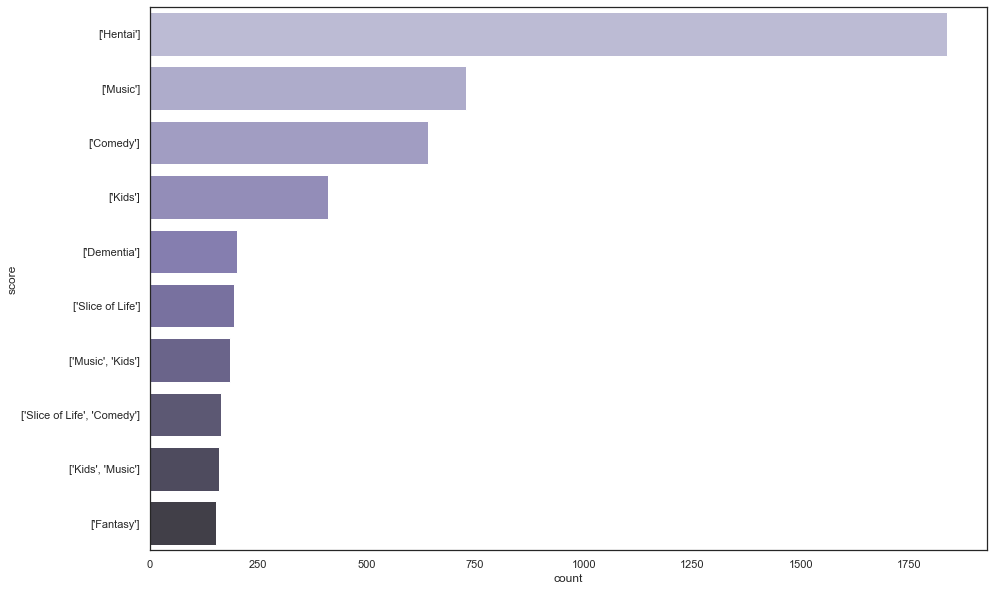

In [ ]:
#displaying the 'score' and 'count' into a barplot 
sns.set(style="white")
genre_to_count=pd.DataFrame({'score':a.index, 'count':a.values})
plt.figure(figsize=(15,10))
sns.barplot(y="score", x="count", data=genre_to_count,palette="Purples_d")

In [ ]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [ ]:
#cleaning the 'Synopsis' column
animedata['Cleaned_synopsis'] = animedata['synopsis'].apply(lambda x: clean_text(x))

TypeError: expected string or bytes-like object

AttributeError: 'str' object has no attribute 'dtypes'